In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
golden = pd.DataFrame.from_dict([
    {'query': 'q1', 'document': 'doc2'},
    {'query': 'q1', 'document': 'doc3'},
    {'query': 'q2', 'document': 'doc6'},
])

results = pd.DataFrame.from_dict([
    {'query': 'q1', 'document': 'doc1', 'rank': 1},
    {'query': 'q1', 'document': 'doc2', 'rank': 2},
    {'query': 'q1', 'document': 'doc3', 'rank': 3},
    {'query': 'q2', 'document': 'doc4', 'rank': 1},
    {'query': 'q2', 'document': 'doc5', 'rank': 2},
    {'query': 'q2', 'document': 'doc6', 'rank': 3},
])

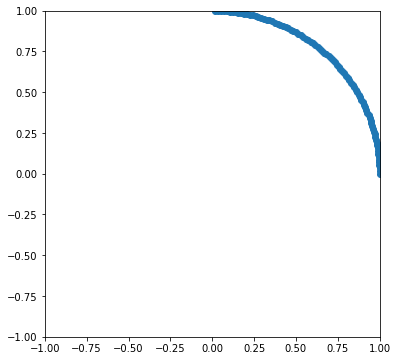

In [69]:
def fake_vector(degrees):
  radians = degrees / 180 * np.pi
  x = np.cos(radians)
  y = np.sin(radians)
  return np.array((x, y))

ts = np.arange(90)
pos = np.array([fake_vector(t) for t in ts])
plt.figure(figsize=(6, 6))
plt.plot(pos[:, 0], pos[:, 1], 'o')
plt.xlim(-1, 1)
plt.ylim(-1, 1);

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
cosine_similarity([[1, 0]], [[1, 1]])

array([[0.70710678]])

In [33]:
cosine_similarity([[1, 0]], [[np.cos(1), 1]])

array([[0.47535482]])

In [34]:
cosine_similarity([[1, 0]], [[np.cos(1), np.sin(1)]])

array([[0.54030231]])

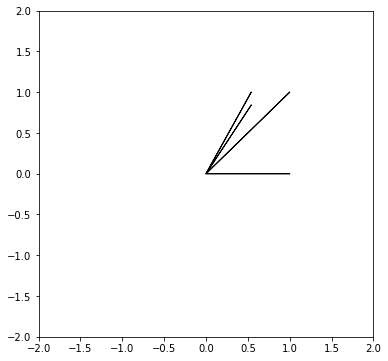

In [50]:
points =[
  [1, 0],
  [1, 1],
  [np.cos(1), 1],
  [np.cos(1), np.sin(1)]
]


plt.figure(figsize=(6, 6))
for p in points:
  plt.arrow(0, 0, p[0], p[1])
plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [82]:
queries = np.array([fake_vector(t) for t in np.arange(90, step=10)])
vectors = np.array([fake_vector(t) for t in np.arange(90)])

In [86]:
distance_matrix = cosine_similarity(queries, vectors)

In [87]:
distance_matrix.shape

(9, 90)

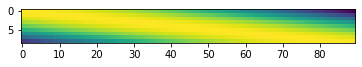

In [88]:
plt.imshow(distance_matrix)

In [92]:
distance_matrix.argmax(axis=1)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [ ]:
np.argsort()

In [116]:
distance_matrix[1].argsort()[::-1]

array([10,  9, 11,  8, 12,  7, 13,  6, 14,  5, 15,  4, 16, 17,  3, 18,  2,
       19,  1, 20,  0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

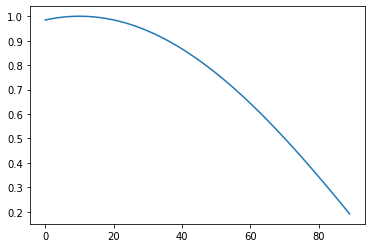

In [113]:
plt.plot(distance_matrix[1])

In [122]:
sorted_index = np.vstack([q.argsort()[::-1] for q in distance_matrix])

In [124]:
sorted_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [10,  9, 11,  8, 12,  7, 13,  6, 14,  5, 15,  4, 16, 17,  3, 18,
         2, 19,  1, 20,  0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [20, 21, 19, 18, 22, 17, 23, 24, 16, 15, 25, 14, 26, 13, 27, 12,
        28, 29, 11, 10, 30,  9, 31,  8, 32,  7, 33,  6, 34, 35,  5, 36,
         4,  3, 37,  2, 38, 39,  1, 40